**Part 1: Regression on California Test Scores**

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns

df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")
df.head()

,rownames,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.   

Text(0, 0.5, 'Number of Schools')

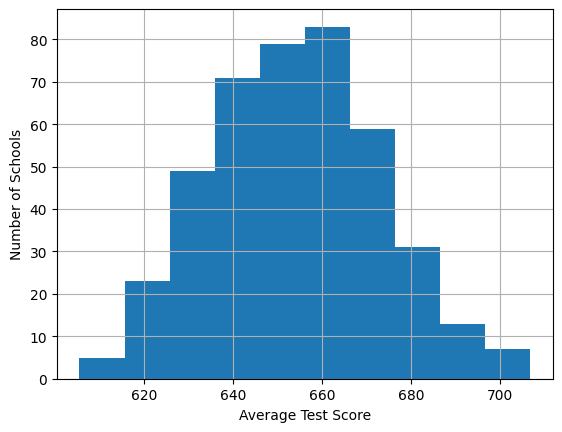

In [ ]:
from matplotlib import pyplot as plt
df['testscr'].hist()
plt.xlabel('Average Test Score')
plt.ylabel('Number of Schools')

Text(0, 0.5, 'Number of Schools')

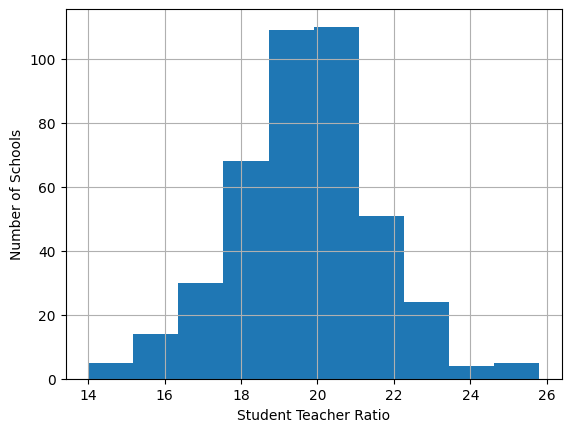

In [ ]:
df['str'].hist()
plt.xlabel('Student Teacher Ratio')
plt.ylabel('Number of Schools')

Text(0, 0.5, 'Number of Schools')

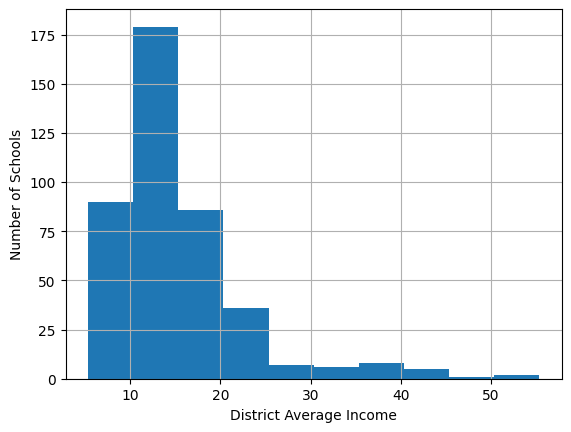

In [ ]:
df['avginc'].hist()
plt.xlabel('District Average Income')
plt.ylabel('Number of Schools')

Text(0, 0.5, 'Number of Schools')

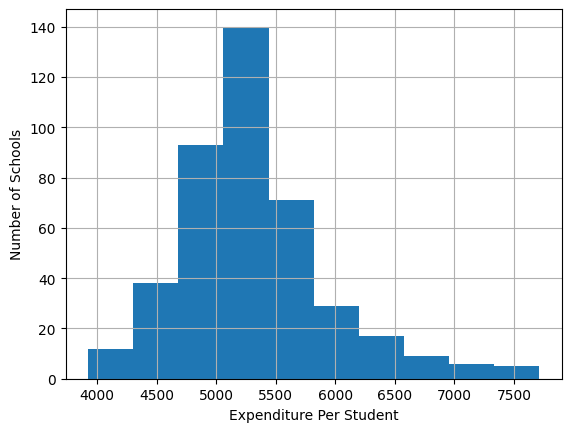

In [ ]:
df['expnstu'].hist()
plt.xlabel('Expenditure Per Student')
plt.ylabel('Number of Schools')

1.2 Visualize the dependency of the target on each feature from 1.1.

Text(0, 0.5, 'Average Test Score')

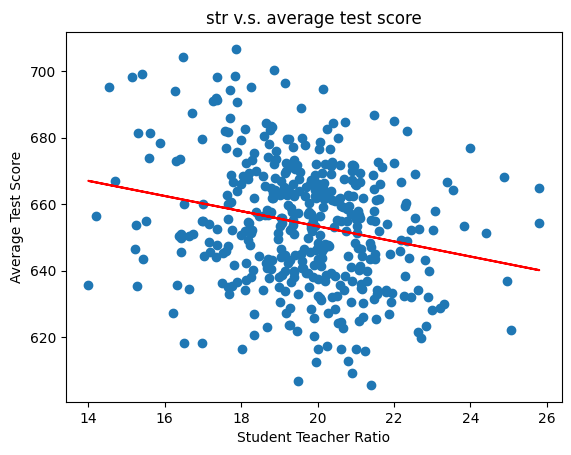

In [ ]:
from sklearn.linear_model import LinearRegression

x1=np.array(df['str'])
y=np.array(df['testscr'])

x1 = x1.reshape(-1, 1)

model = LinearRegression()
model.fit(x1, y)
y_pred = model.predict(x)
plt.plot(x1, y_pred, label='Linear Regression Line', color='red')

plt.scatter(df['str'], df['testscr'])
plt.title("str v.s. average test score")
plt.xlabel("Student Teacher Ratio")
plt.ylabel("Average Test Score")

Text(0, 0.5, 'Average Test Score')

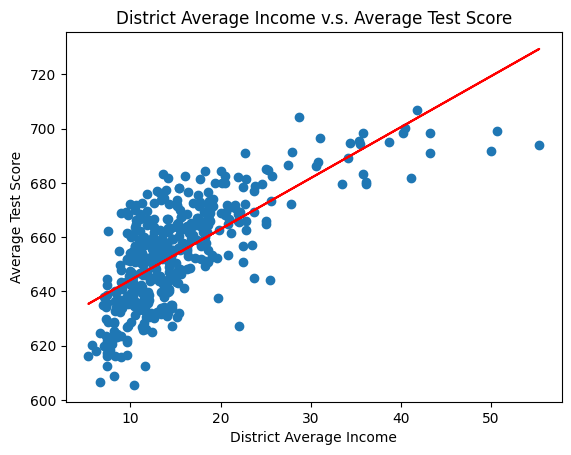

In [ ]:
x2=np.array(df['avginc'])
y=np.array(df['testscr'])

x2 = x2.reshape(-1, 1)

model = LinearRegression()
model.fit(x2, y)
y_pred = model.predict(x2)
plt.plot(x2, y_pred, label='Linear Regression Line', color='red')

plt.scatter(df['avginc'], df['testscr'])
plt.title("District Average Income v.s. Average Test Score")
plt.xlabel("District Average Income")
plt.ylabel("Average Test Score")

Text(0, 0.5, 'Average Test Score')

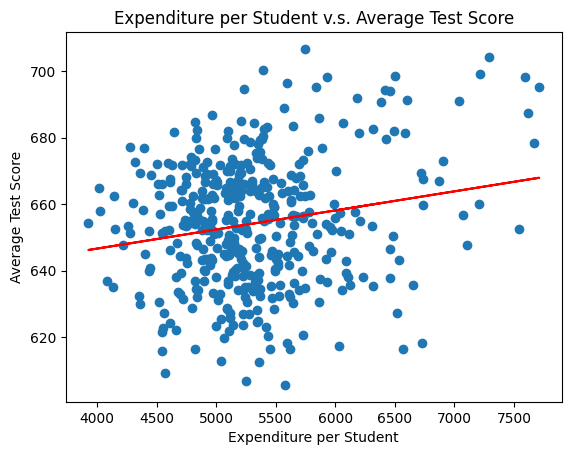

In [ ]:
x3=np.array(df['expnstu'])
y=np.array(df['testscr'])

x3 = x3.reshape(-1, 1)

model = LinearRegression()
model.fit(x3, y)
y_pred = model.predict(x3)
plt.plot(x3, y_pred, label='Linear Regression Line', color='red')

plt.scatter(df['expnstu'], df['testscr'])
plt.title("Expenditure per Student v.s. Average Test Score")
plt.xlabel("Expenditure per Student")
plt.ylabel("Average Test Score")

1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?



In [ ]:
df = df[["enrltot","teachers","calwpct","mealpct","computer","testscr","compstu","expnstu","str","avginc","elpct"]]
df.head()

,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677


In [ ]:
y=df['testscr']
X=df.loc[:, df.columns != 'testscr']

print(y[0:5])
X.head()

0    690.799988
1    661.200012
2    643.599976
3    647.700012
4    640.849976
Name: testscr, dtype: float64


,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,0.128090,5235.987793,18.671329,9.080333,13.857677


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
print("knn:" + str(knn.score(X_test, y_test)))

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print("knn_scaled:" + str(knn.score(X_test_scaled, y_test)))


knn:-0.012001466918634573
knn_scaled:0.7942871688110476


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print(X_train.columns)
print("lr.coef_: "+str(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

Index(['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'compstu',
       'expnstu', 'str', 'avginc', 'elpct'],
      dtype='object')
lr.coef_: [ 3.50529268e-04 -5.94448612e-03 -7.51940798e-02 -3.97412791e-01
 -6.11891242e-04  2.33253179e+01  1.21773520e-03 -3.45181597e-01
  5.86988079e-01 -1.85164009e-01]
lr.intercept_: 664.2840527394483


In [ ]:
from sklearn.linear_model import Ridge

rg=Ridge()
rg.fit(X_train,y_train)
print("Training set score: {:.2f}".format(rg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rg.score(X_test, y_test)))
print("rg.coef_: {}".format(rg.coef_))

Training set score: 0.80
Test set score: 0.83
rg.coef_: [ 6.67994576e-04 -1.74654464e-02 -8.97628626e-02 -3.89926310e-01
  1.53584867e-03  1.03641791e+01  1.47219217e-03 -4.29993163e-01
  5.91446395e-01 -1.93719809e-01]


In [ ]:
np.sum(lasso.coef_!=0)

7

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

print("lasso.coef_: {}".format(lasso.coef_))


Training set score: 0.80
Test set score: 0.83
Number of features used: 7
lasso.coef_: [-3.50766163e-04 -0.00000000e+00 -9.08461706e-02 -3.99615491e-01
  2.69743019e-03  0.00000000e+00  2.58164069e-03 -0.00000000e+00
  5.50127908e-01 -1.92470958e-01]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

print("KNN: "+str(cross_val_score(knn, X_train, y_train, cv=kfold).mean()))
print("KNN_scale: "+str(cross_val_score(knn, X_train_scaled, y_train, cv=kfold).mean()))

print("Linear Regression: "+str(cross_val_score(lr, X_train, y_train, cv=kfold).mean()))

print("Ridge: "+str(cross_val_score(rg, X_train, y_train, cv=kfold).mean()))

print("Lasso: "+str(cross_val_score(lasso, X_train, y_train, cv=kfold).mean()))

KNN: -0.004972701872224117
KNN_scale: 0.7115480560549877
Linear Regression: 0.7910219660775242
Ridge: 0.7899602942012101
Lasso: 0.787727366717929


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.570e+02, tolerance: 8.834e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.096e+03, tolerance: 9.183e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.773e+03, tolerance: 9.610e

**Does scaling the data with the StandardScaler help?**
It signidicantly improved the KNN regression.

1.4 Tune the parameters of the models where possible using GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}

ridge_param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
}

lasso_param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
}

knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='r2')
ridge_grid_search = GridSearchCV(rg, ridge_param_grid, cv=5, scoring='r2')
lasso_grid_search = GridSearchCV(lasso, lasso_param_grid, cv=5, scoring='r2')

knn_grid_search.fit(X_train_scaled, y_train)
ridge_grid_search.fit(X_train, y_train)
lasso_grid_search.fit(X_train, y_train)

print("KNN Best Parameters:", knn_grid_search.best_params_)
print("KNN Best R^2:", knn_grid_search.best_score_)

print("Ridge Best Parameters:", ridge_grid_search.best_params_)
print("Ridge Best R^2:", ridge_grid_search.best_score_)


print("Lasso Best Parameters:", lasso_grid_search.best_params_)
print("Lasso Best R^2:", lasso_grid_search.best_score_)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.540e+03, tolerance: 8.834e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.319e+03, tolerance: 9.574e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.871e+03, tolerance: 9.364e

KNN Best Parameters: {'n_neighbors': 9, 'weights': 'distance'}
KNN Best R^2: 0.7323894940946765
Ridge Best Parameters: {'alpha': 0.1}
Ridge Best R^2: 0.7910528124238344
Lasso Best Parameters: {'alpha': 0.01}
Lasso Best R^2: 0.7909611663335858


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.163e+03, tolerance: 9.574e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.845e+03, tolerance: 9.364e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.655e+03, tolerance: 9.183e

**Does the result improve? **The result slightly improved for Ridge and Lasso regression, but significantly worsen for KNN regression.

1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

In [ ]:
data = {
    'rg.coef_': [0.63674272, -0.34779468, -0.93134251, -10.48487388, -0.30906932, 1.44373493, 0.76367952, -0.61064469, 4.26710266, -3.33476317],
    'lasso.coef_': [-0.0, -0.0, -0.0, -11.18837073, -0.0, 0.96796565, 0.20592308, -0.29396359, 3.80675589, -2.55047088]
}

index = ['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'compstu', 'expnstu', 'str', 'avginc', 'elpct']
df = pd.DataFrame(data, index=index)

print(df)


           rg.coef_  lasso.coef_
enrltot    0.636743    -0.000000
teachers  -0.347795    -0.000000
calwpct   -0.931343    -0.000000
mealpct  -10.484874   -11.188371
computer  -0.309069    -0.000000
compstu    1.443735     0.967966
expnstu    0.763680     0.205923
str       -0.610645    -0.293964
avginc     4.267103     3.806756
elpct     -3.334763    -2.550471


For the Ridge regression and Lasso regression model with alpha=0.1, they do generally have similar proclivity in choosing features. For example, variable *mealpct*, percent qualifying for reduced-price lunch exhibited a strong negative coefficient. Whereas avginc, average income, has a positive coefficient (around 3-4). Percent of English teacher,elpct,also exhibit a small negative relationship with the target data.

1.6 Now that you have experimented with different models, discuss which final model you would choose to predict new data

Numerical wise, ridge regression(alpha=0.1) has the highest r-square value. Also ridge regression is used when one has many features and wants to prevent overfitting. The regularization term helps to stabilize the model by reducing the impact of multicollinearity. Intuitive wise, lasso regression eliminated some of the features I deemed to be influential with the target data, therefore, it might be questionable to apply lasso regression.
